<a href="https://colab.research.google.com/github/leonardosva/mvp_cancer/blob/main/Ultimo_MVP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Análise de Dados e Boas Práticas

*Por* Leonardo Silva

#1. Definição do Problema
*Conjunto de dados de câncer de mama.*

Este conjunto de dados contém as características dos pacientes com diagnóstico de câncer de mama.

O conjunto contém um ID único para cada paciente, o tipo de câncer (diagnosis), as características visuais do câncer bem como os valores médios dessas características.

📚 As principais atributos do conjunto de dados são:

**id:** Representa um ID exclusivo de cada paciente.

**diagnosis:** Indica o tipo de câncer. Esta propriedade pode assumir os valores “M” (Maligno) ou “B” (Benigno).

**radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave...**:
Representa os valores médios das características visuais, com valor real para cada núcleo celular.

**Target** - Variável de classe (1 - Maligno ou 0- Benigno)

Existem também vários recursos categóricos em que os pacientes no conjunto de dados são rotulados com valores numéricos.

Cada amostra contém a identificação única do paciente, o diagnóstico de câncer e os valores médios das características visuais do câncer.

Para mais detalhes sobre este conjunto de dados, consulte: https://www.kaggle.com/datasets/erdemtaha/cancer-data

# Objetivos:

Explorar uma base de dados implementando e visualizando informações para construção de um modelo supervisionado e avaliar sua eficácia.

Esta base de dados contém tipos de Câncer entre Benignos e Malignos.
De acordo com determinadas características (Features), vamos prever nossas respostas (Targets).

Vamos ensinar máquinas a realizar diagósticos (com a maior taxa de acerto possível) baseados em dados históricos.


In [1]:
# Importando as bibliotecas padrão

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn import metrics # analisa a acurácia de nossos modelos

# Ocultando Warnings indesejados
import warnings
warnings.filterwarnings('ignore')

# Para tratamento de missings
import missingno as ms

#2. Carga de Dados

Utilizando o pacote Pandas, iremos carregar um arquivo .csv disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [2]:
## Importando nossa base de dados
#url = "https://raw.githubusercontent.com/leonardosva/mvp_cancer/main/Cancer_Data.csv"
url = "https://raw.githubusercontent.com/leonardosva/mvp_cancer/main/Cancer_DataSet.csv"

# Lê o arquivo utilizando as colunas informadas
dados = pd.read_csv(url, delimiter=';')

# Exibição das 5 primeiras linhas do dataset
dados.head(5)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,842302,M,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [3]:
# Tranformando a base de dados em um DataFrame.
cancer=pd.DataFrame(data=dados, columns=dados.columns)

#3. Análise de Dados


3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [4]:
# Vamos começar descobrindo as dimensões de nosso dataframe - Linhas X Colunas
# Nosso df tem 676 linhas distribuidas entre 33 colunas
cancer.shape

(676, 33)

In [5]:
# Mostra as informações do dataset
print(cancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       676 non-null    int64  
 1   diagnosis                676 non-null    object 
 2   radius_mean              676 non-null    float64
 3   texture_mean             667 non-null    float64
 4   perimeter_mean           676 non-null    float64
 5   area_mean                676 non-null    float64
 6   smoothness_mean          676 non-null    float64
 7   compactness_mean         674 non-null    float64
 8   concavity_mean           676 non-null    float64
 9   concave points_mean      676 non-null    float64
 10  symmetry_mean            676 non-null    float64
 11  fractal_dimension_mean   673 non-null    float64
 12  radius_se                675 non-null    float64
 13  texture_se               675 non-null    float64
 14  perimeter_se             6

In [6]:
# Visualizando as 3 primeiras linhas de nosso dataframe.
cancer.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,842302,M,17.99,NaN,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1


In [7]:
# Visualizando as 3 últimas  linhas de nosso dataframe.
cancer.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
673,658986,M,14.25,22.15,96.42,645.7,0.1049,0.2008,0.2135,0.08653,...,29.51,119.1,959.5,0.1640,0.6247,0.6922,0.1785,0.2844,0.11320,1
674,65922302,M,12.68,23.84,82.69,499.0,0.1122,0.1262,0.1128,0.06873,...,33.47,111.8,888.3,0.1851,0.4061,0.4024,0.1716,0.3383,0.10310,1
675,659283,M,14.78,23.94,97.40,668.3,0.1172,0.1479,0.1267,0.09029,...,33.39,114.6,925.1,0.1648,0.3416,0.3024,0.1614,0.3321,0.08911,1


É sempre importante verificar o tipo do atributos do dataset, pois pode ser necessário realizar conversões. Já fizemos anteriormente com o comando info, mas vamos ver uma outra forma de verificar a natureza de cada atributo e então exibir um resumo estatístico do dataset.

In [8]:
# Verifica o tipo de dataset de cada atributo.
cancer.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [9]:
# Verificando o desbalanceamento e discrepâncias do DataFrame (média, desvio padrão, mínimo, máximo e os quartis)
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
count,6.760000e+02,676.000000,667.000000,676.000000,676.000000,676.000000,674.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,2.841311e+07,14.364984,19.530465,93.742175,675.163757,0.097691,0.111061,0.097190,0.053410,0.183986,...,26.148254,110.707751,928.173077,0.135127,0.280105,0.300639,0.124628,0.299618,0.086590,0.463018
std,1.154141e+08,3.460138,4.187723,23.853191,344.491359,0.014240,0.055690,0.079935,0.038959,0.028494,...,6.087408,33.692808,570.806303,0.023847,0.176384,0.218290,0.068065,0.069350,0.020518,0.499000
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.597155e+05,11.885000,16.505000,76.815000,433.550000,0.087420,0.067550,0.032990,0.022085,0.163475,...,21.555000,85.917500,530.875000,0.118475,0.155100,0.132350,0.069573,0.254150,0.072612,0.000000
50%,9.032470e+05,13.645000,19.240000,88.110000,572.900000,0.097400,0.102250,0.078245,0.043620,0.181250,...,25.995000,102.500000,739.850000,0.134700,0.231600,0.262300,0.112750,0.286950,0.081745,0.000000
75%,8.812940e+06,16.262500,21.975000,108.100000,818.225000,0.106825,0.142425,0.146525,0.081230,0.199125,...,30.455000,130.400000,1227.250000,0.150225,0.373500,0.414925,0.178500,0.327425,0.096180,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Como observamos acima que nossa base de dados tem 676 linhas, ou seja, temos dados sobre diagnósticos diferentes entre câncer benigno e maligno.

Vamos começar olhando como estão distribuidos estes diagnósticos

Veremos que as Classes 1 (Máligno) e 0 (Benigno) estão balanceadas.

** Vamos guardar esta informação, pois possivelmente precisaremos realizar algum tipo de tratamento nas próximas etapas.

In [10]:
# Distribuição de nossas classes.
cancer['Target'].value_counts() # 0- Benigno 1 = Máligno

,count
Target,
0,363
1,313


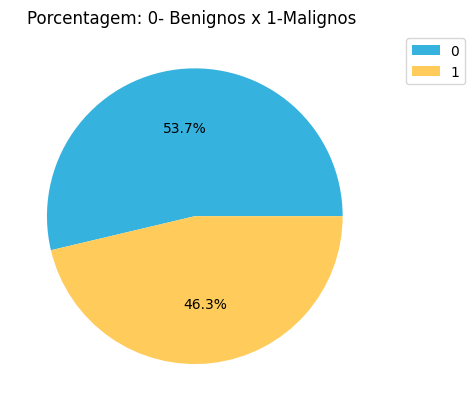

In [11]:
# Temos a informação: 363 casos benignos e 313 casos malignos.

# Vamos visualizar isso melhor Criando um Gráfico de Pizza.

 # Apenas escolhendo as cores.
colors=['#35b2de','#ffcb5a'] # Apenas escolhando as cores

labels=cancer['Target'].value_counts().index
plt.pie(cancer['Target'].value_counts(),autopct='%1.1f%%',colors=colors) # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(labels,bbox_to_anchor=(1.25,1),)
# Definindo as Legendas
plt.title('Porcentagem: 0- Benignos x 1-Malignos ')
plt.show()

3.2. Visualizações Unimodais

Criando um histograma para cada atributo do dataset.


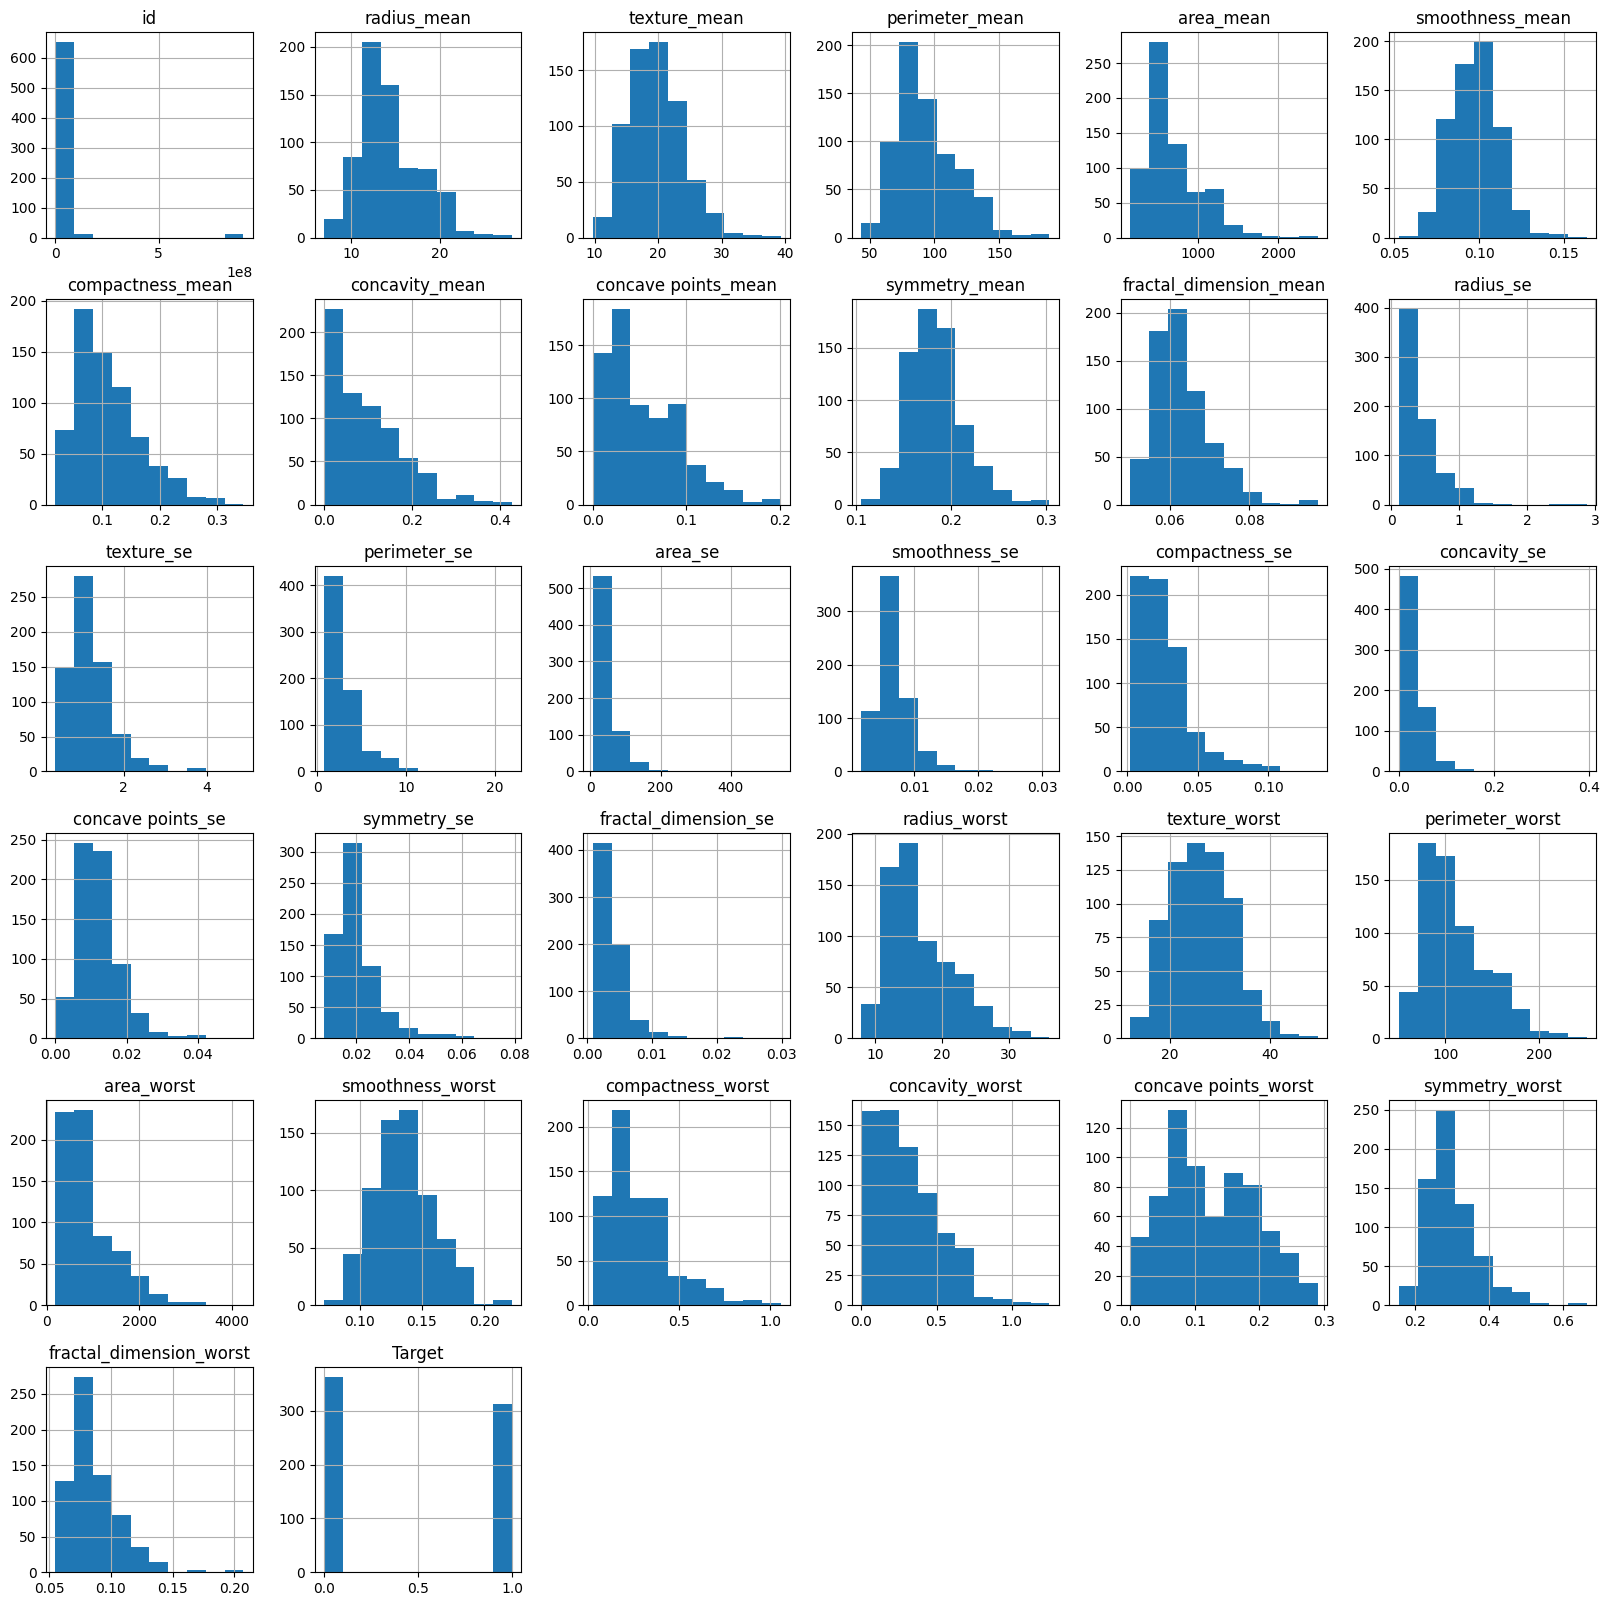

In [12]:
# Histograma
cancer.hist(figsize = (20,20))
plt.show()

Observamos que os atributos **concavity_mean** , **concavity_points_mean**, **perimeter_se**, por exemplo,  seguem uma distribuição exponencial, e que as colunas **radius_meam** e **smootheness_mean**, por exemplo,seguem uma distribuição aproximadamente normal.

In [13]:
# Convertendo os valores categóricos da coluna 'diagnosis' em valores numéricos.
cancer['diagnosis'] = cancer['diagnosis'].map({'M':1,'B':0})
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Target
0,842302,1,17.99,NaN,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [14]:
# Extraindo um subconjunto de colunas e atribuindo-os a uma lista chamada features_mean.
features_mean=list(cancer.columns[1:11])

# Divide o dataframe em dois com base no diagnóstico
dfM=cancer[cancer['Target'] ==1]
dfB=cancer[cancer['Target'] ==0]

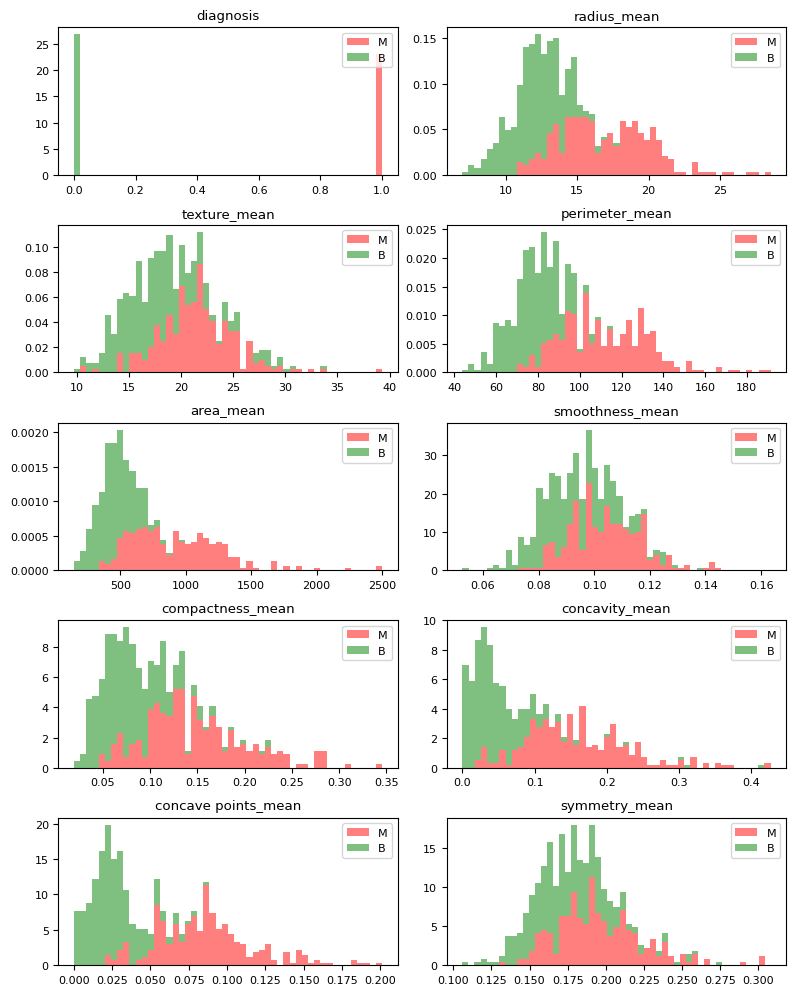

In [15]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    # Verificando que a coluna tenha valores numéricos válidos para cálculos mínimos/máximos.
    column_data = cancer[features_mean[idx]].dropna()  # Drop NaN values

    # Recalcule a largura de compartimento usando os dados válidos.
    if len(column_data) > 0:  # Entra apenas se houver dados válidos.
        binwidth= (max(column_data) - min(column_data))/50
        ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(column_data), max(column_data) + binwidth, binwidth) , alpha=0.5,stacked=True, density=True, label=['M','B'],color=['r','g'])
    else:
        print(f"Skipping column '{features_mean[idx]}' due to invalid data.")

    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

Observações

Valores médios de **radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean e concave_points_mean** podem ser utilizados na classificação do câncer. Valores maiores desses parâmetros tendem a apresentar correlação com tumores malignos.

valores médios **texture_mean, smoothness_mean e symmetry_mean** não mostram uma preferência particular de um diagnóstico sobre o outro.

Em qualquer um dos histogramas não há grandes valores discrepantes que justifiquem uma limpeza adicional.

Bem similar ao histogramas, o Gráfico de Densidade, ou Density Plot,possui uma visualização um pouco diferente.

Vamos criar um density plot para cada atributo do dataset assim como foi feito nos histogramas acima para identificar melhor a distribuição do atributos do dataset.

Percebe-se atributos com uma distribuição distorcida.

Uma transformação como a Box-Cox, que pode aproximar a distribuição de uma Normal, pode ser útil neste caso.

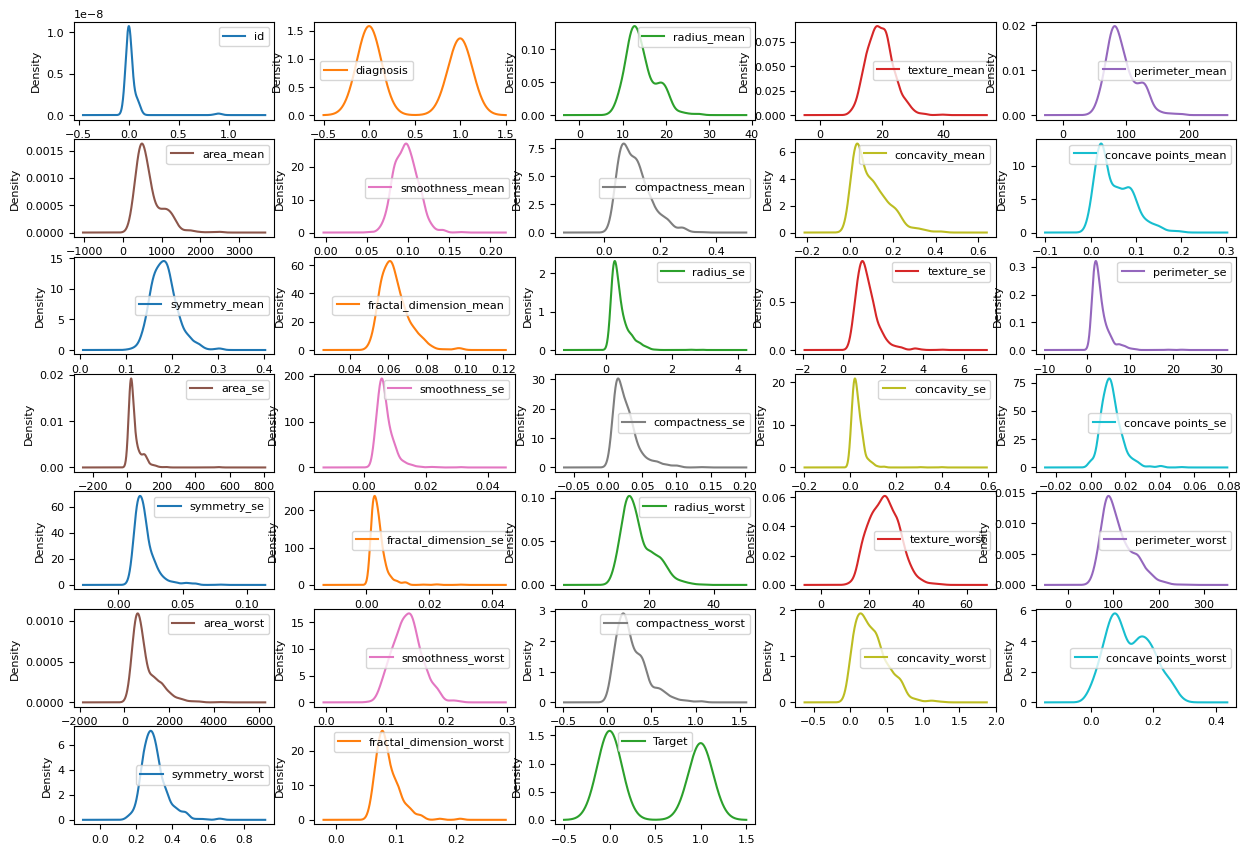

In [16]:
# Density Plot
cancer.plot(kind = 'density', subplots = True, layout = (10,5), sharex = False, figsize = (15,15))
plt.show()

Vamos agora trabalhar com boxplots. No boxblot, a linha no centro (verde) representa o valor da mediana (segundo quartil ou p50). A linha abaixo é o 1o quartil (p25) e a linha acima o terceiro quartil (p75). O boxplot ajuda a ter uma ideia da dispersão dos dataset e os possíveis outliers.

OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.

Nos gráficos bloxplot, veremos que a dispersão dos atributos do dataset é bem diferente.

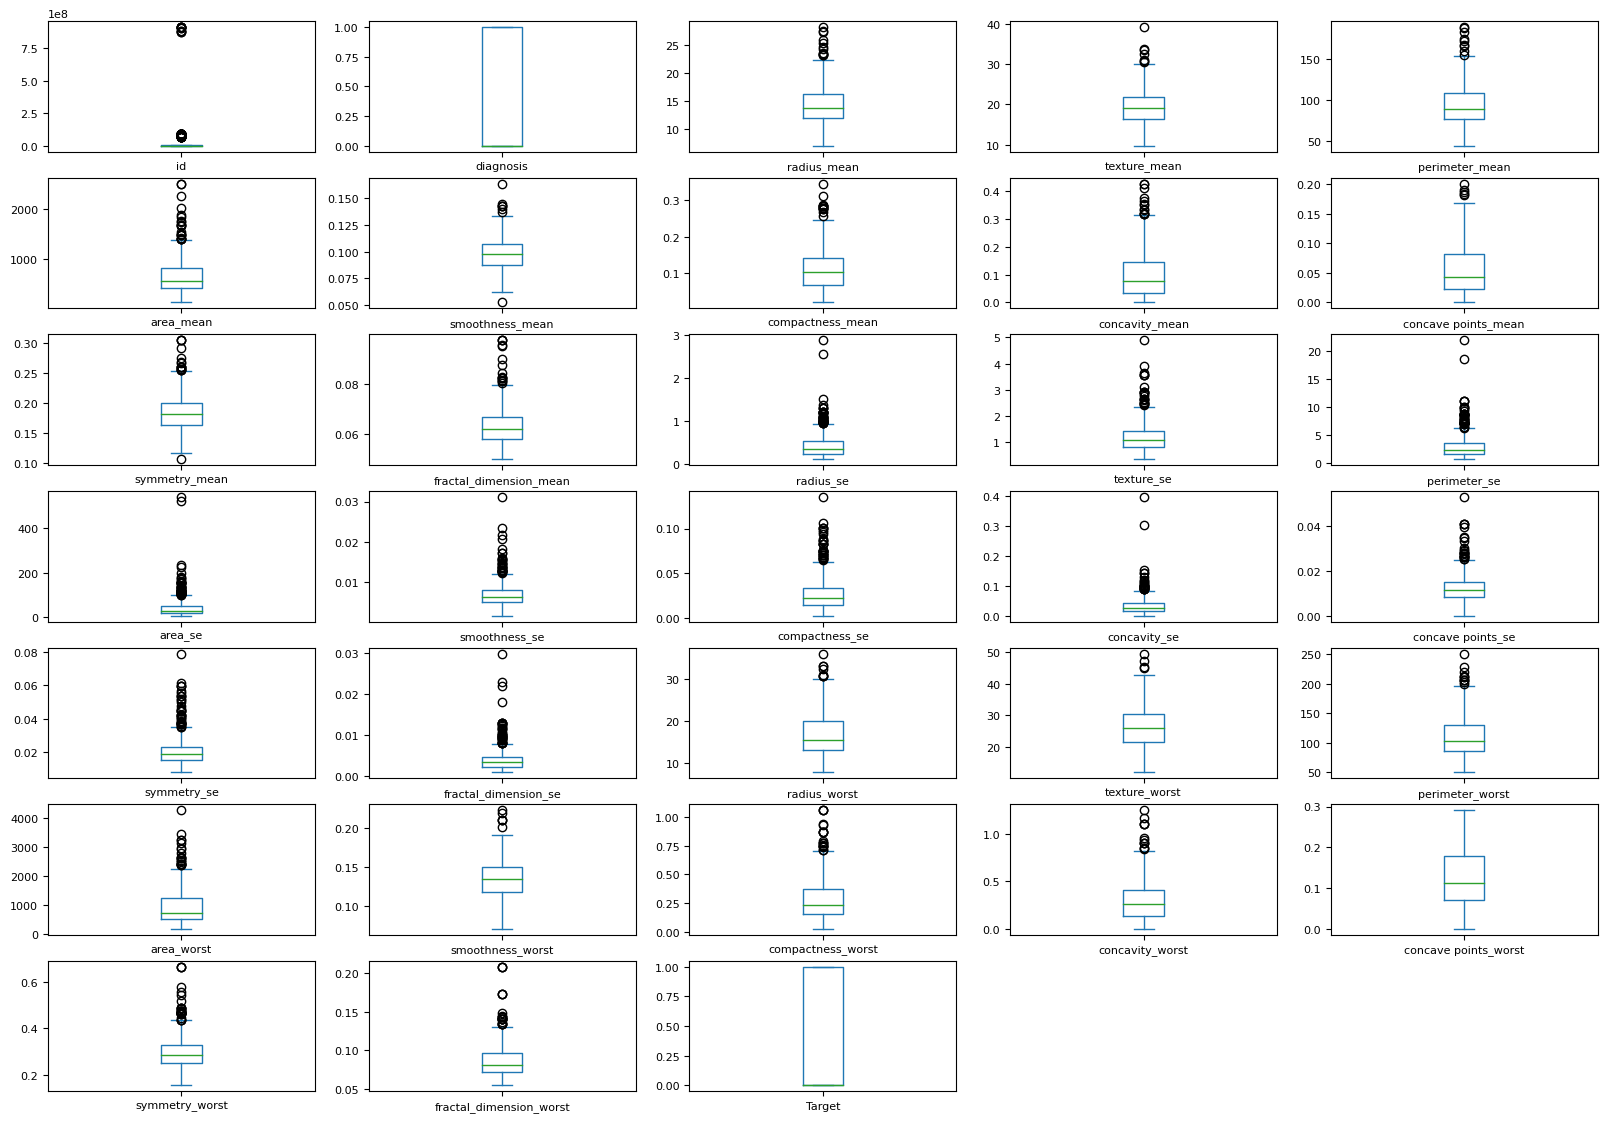

In [17]:
# Boxplot
cancer.plot(kind = 'box', subplots = True, layout = (10,5), sharex = False, sharey = False, figsize = (20,20))
plt.show()

Observações:
As colunas a seguir são as que mostram a maior correlação com nossa coluna de diagnóstico. Há duas coisas que podem ser feitas.
Podemos usar apenas as colunas que têm maior correlação ou podemos continuar a usar todas as colunas.
Usarei todas essas colunas para prever nosso resultado
Mas podemos eliminar alguns e ver se a precisão melhora!

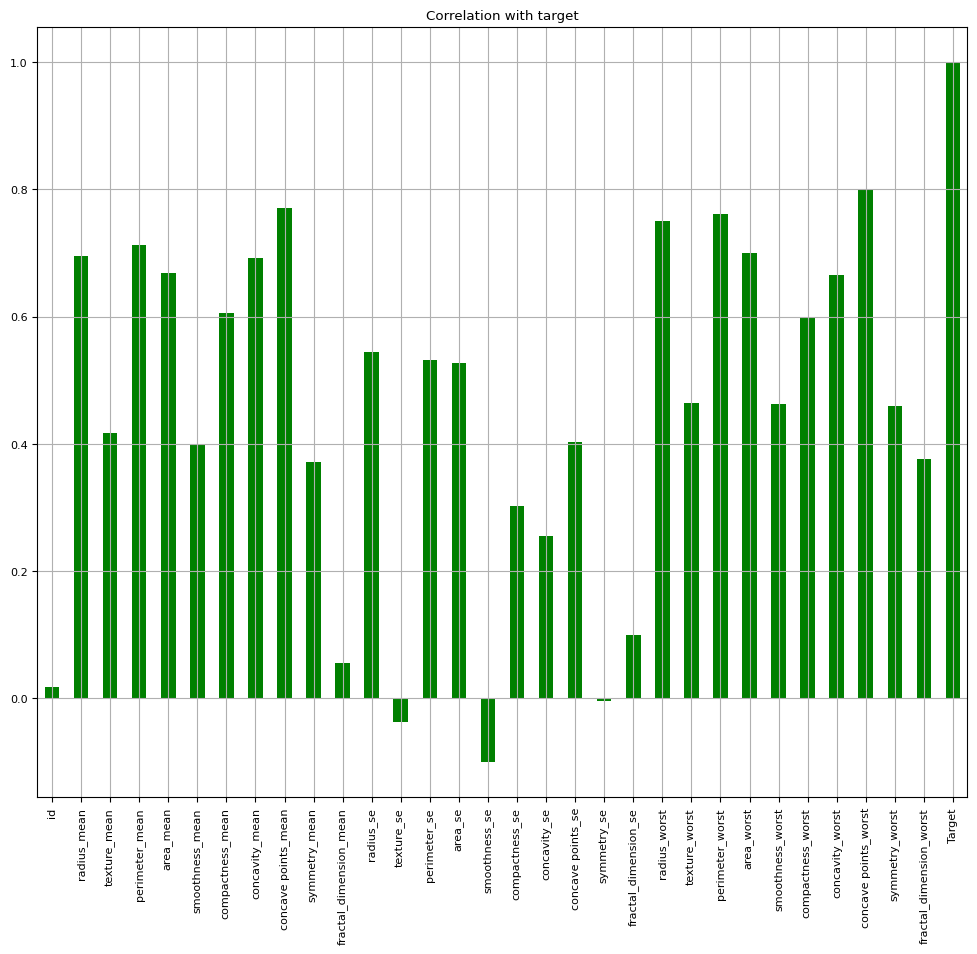

In [18]:
# Verificando graficamente a correlação com a Target
cancer.drop('diagnosis', axis=1).corrwith(cancer.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

#4. Pré-Processamento de Dados

Nesta etapa, vamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding.

4.1. Tratamento de Missings e Limpeza

Veremos que o datset tem missings aparentes, valores "NULLs" que aparentam ser missings. Vamos então fazer este tratamento e criar uma nova visão do nosso dataset.

<Axes: >

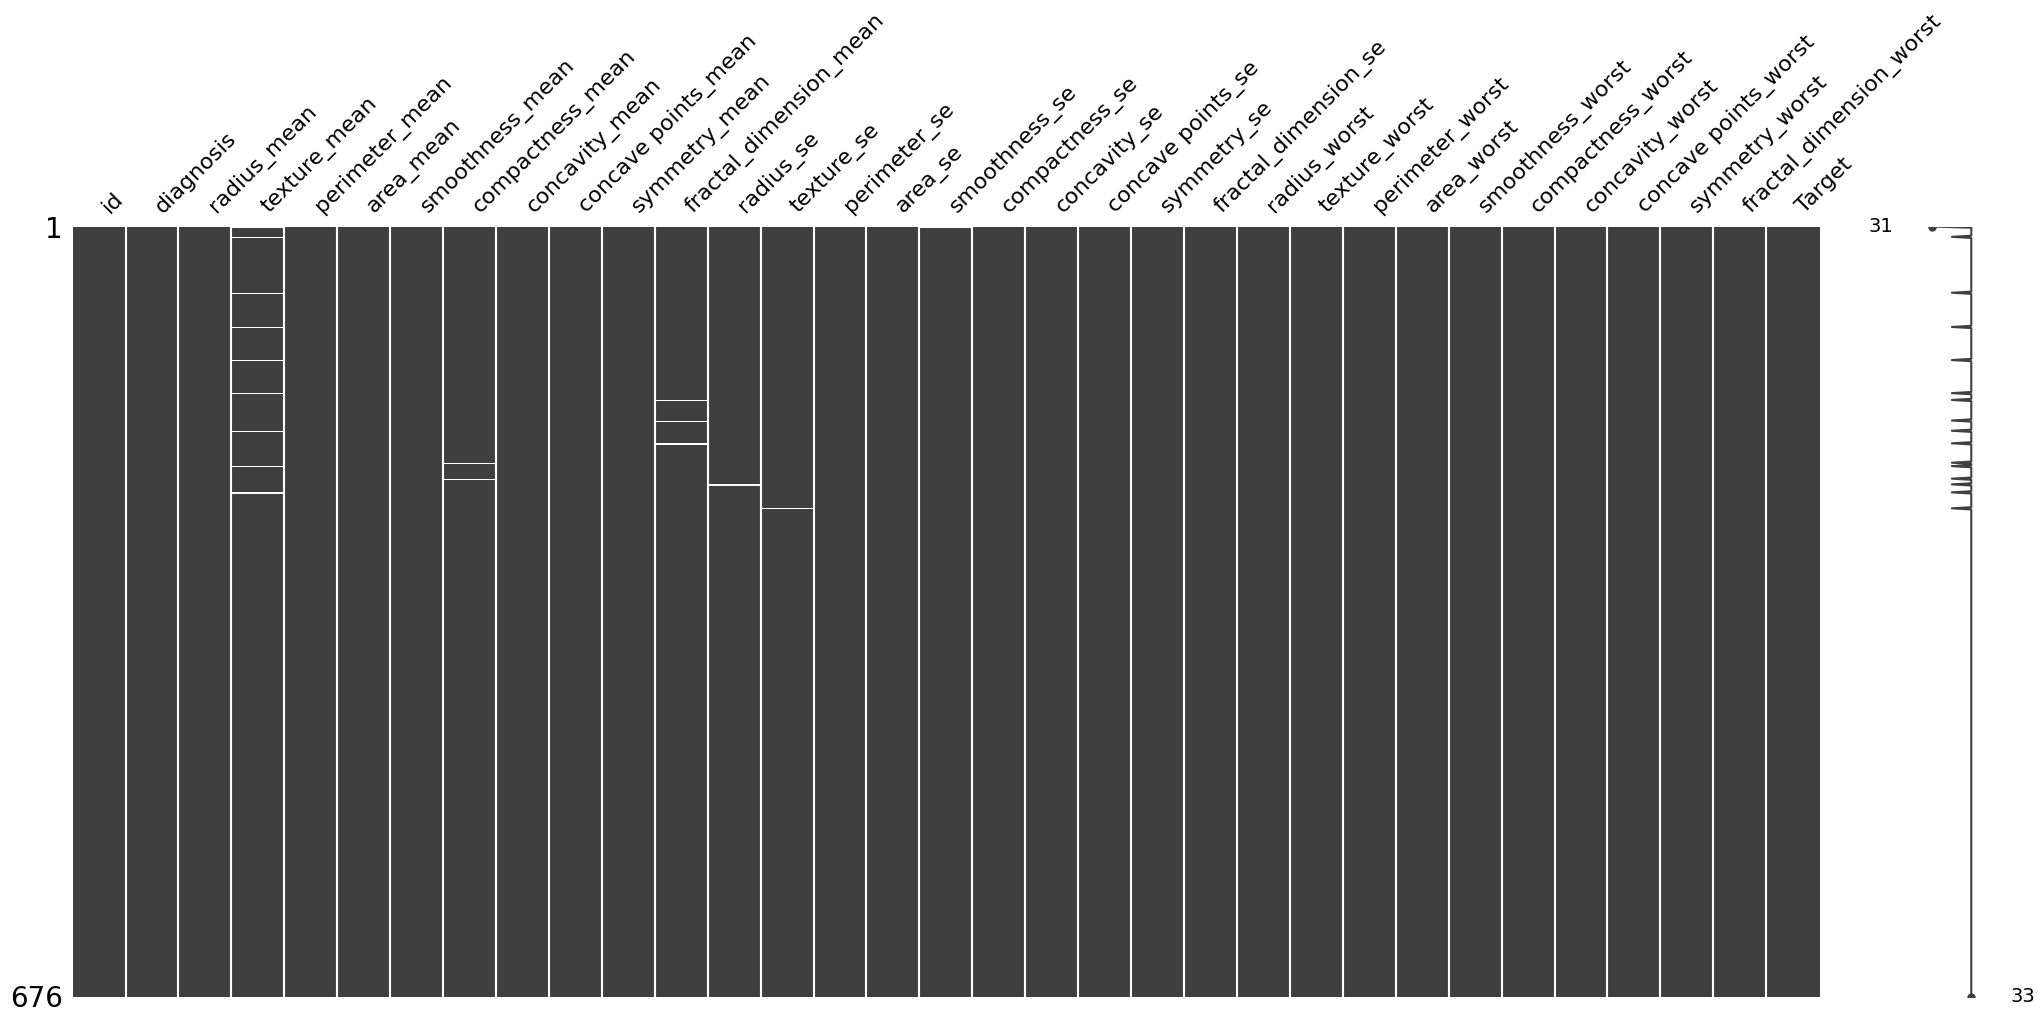

In [19]:
# Salvando um NOVO dataset chamado de atributos para tratamento de missings.

# Recuperando os nomes das colunas.
col = list(cancer.columns)

# O novo dataset irá conter todas as colunas.
#atributos = cancer[col[0:-1]]
atributos = cancer.copy()

# Exibindo visualização matricial da nulidade do dataset.
ms.matrix(atributos)


Para uma visualização mais intuitiva, especialmente para DataFrames com muitas colunas, vamos substituir um estrutura de dados tabular muito utilizada em Python para análise de dados (**Ex: cancer.isnull().sum()**), por um gráfico de barras tambem é ideal para visualizar essa saída de forma clara e concisa.

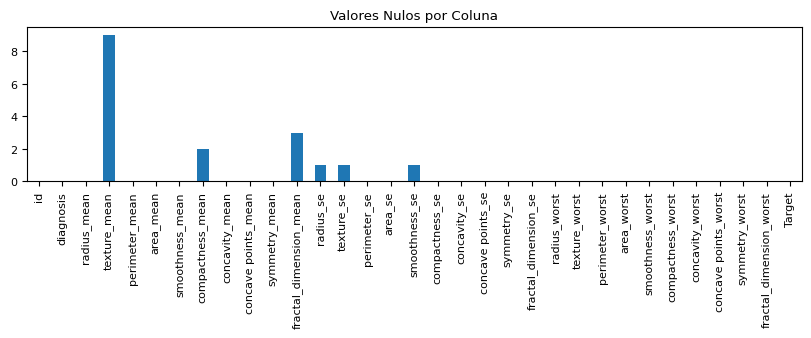

In [20]:
# Visualização mais Intuitiva.
#cancer.isnull().sum()
import matplotlib.pyplot as plt

(atributos.isnull().sum()
 .plot(kind='bar', figsize=(10, 2))
 .set_title('Valores Nulos por Coluna'))
plt.show()

<Axes: >

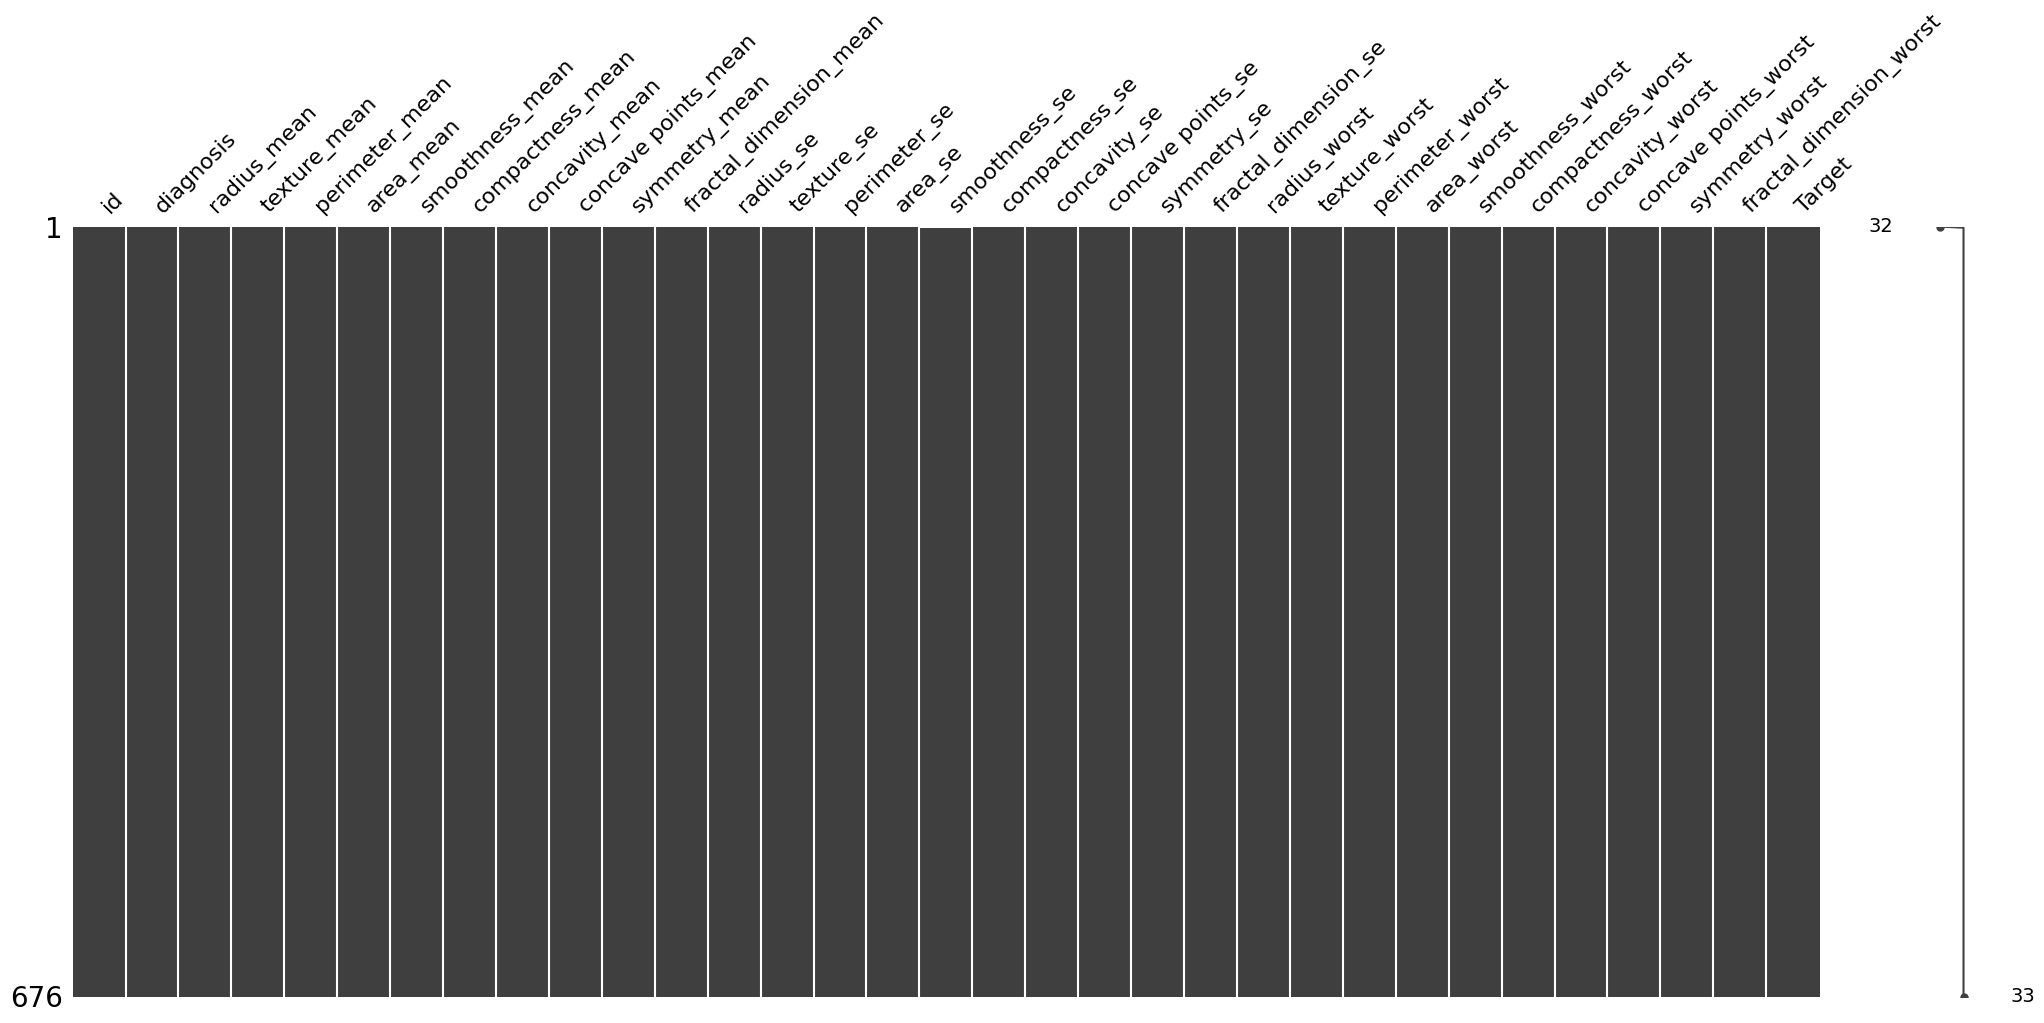

In [21]:
# Substituindo os NaN de 'texture_mean' e 'texture_se' por 0.
atributos['texture_mean'].fillna(0, inplace=True)
atributos['texture_se'].fillna(0, inplace=True)

# Substituindo os NaN de 'compactness_mean', 'fractal_dimension_mean'e 'radius_se' pela mediana da coluna.
atributos['compactness_mean'].fillna(atributos['compactness_mean'].median(), inplace=True)
atributos['fractal_dimension_mean'].fillna(atributos['fractal_dimension_mean'].median(), inplace=True)
atributos['radius_se'].fillna(atributos['radius_se'].median(), inplace=True)

# Exibindo visualização matricial da nulidade do dataset.
ms.matrix(atributos)

In [22]:
# Distribuição de nossas classes.
atributos['Target'].value_counts() # 0- Benigno 1 = Máligno

,count
Target,
0,363
1,313


Bem, como podemos ver temos mais casos de 0- Benignos do que de 1-Málignos.

Porem temos uma quantidade balanceada de cada tipo para podermos construir nossos modelos.

Esta base de dados não é muito desequilibrada, mesmo assim é importante sempre avaliar um balanceamento para que no futuro nosso modelo não fique bom apenas em prever casos Benignos, ou apenas casos Málignos, chamamos isso de Overfitting.

O ideal é termos uma base de dados 50/50, onde os diagnósticos benignos e málignos, tenham a mesma quantidade.

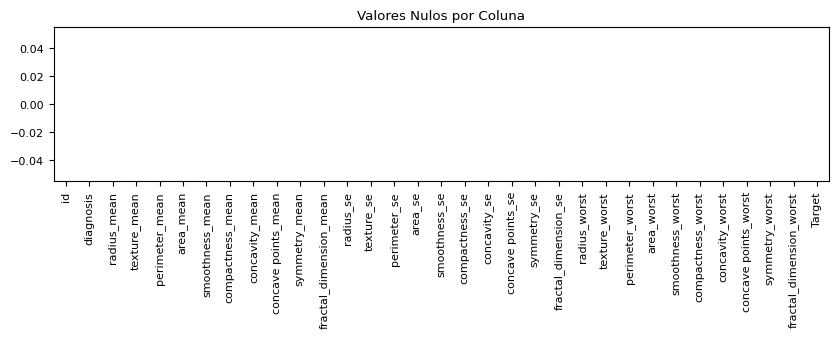

In [23]:
# Drop columns with all null values
#cancer = cancer.dropna(axis=1, how='any')

# Drop rows with all null values
atributos = atributos.dropna(axis=0, how='any')

#atributos.isnull().sum()
import matplotlib.pyplot as plt

(atributos.isnull().sum()
 .plot(kind='bar', figsize=(10, 2))
 .set_title('Valores Nulos por Coluna'))
plt.show()

<Axes: >

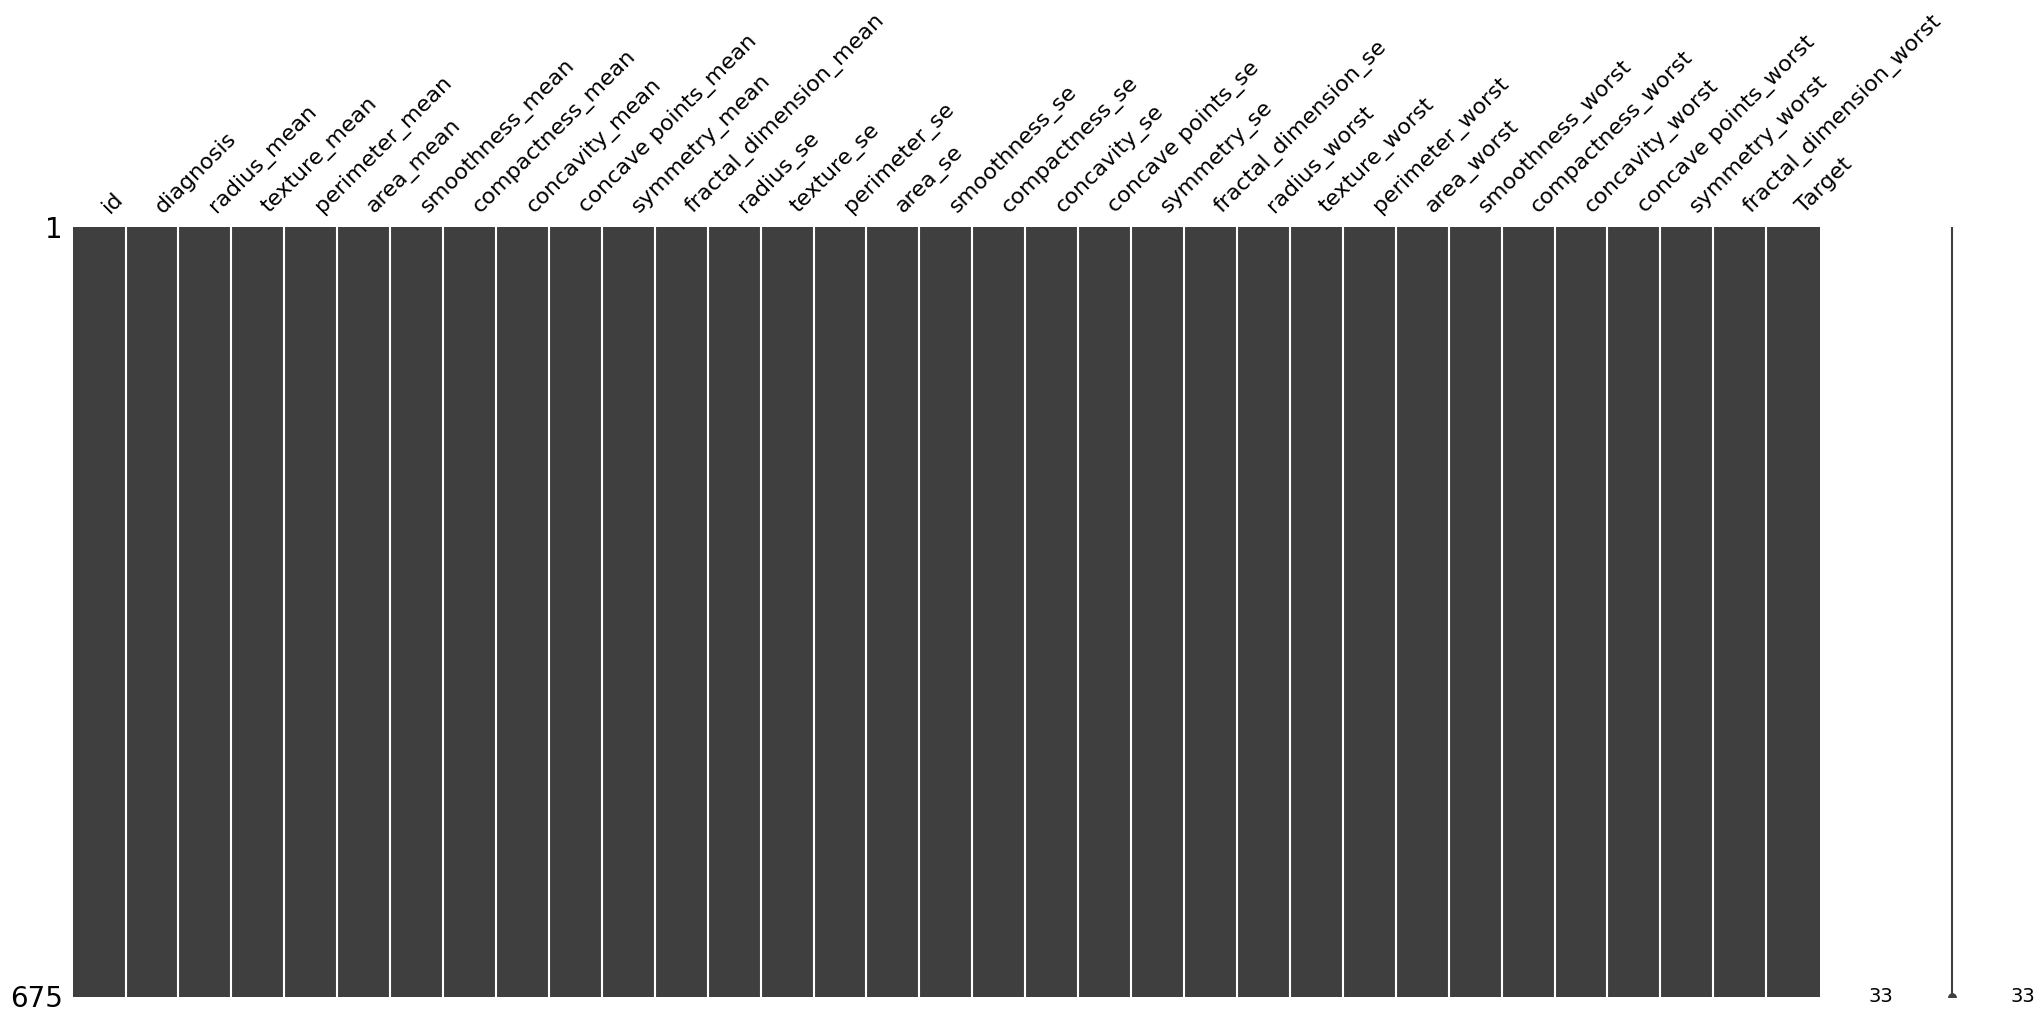

In [24]:
# Exibindo visualização matricial da nulidade do dataset.
ms.matrix(atributos)

4.2. Separação em conjunto de treino e conjunto de teste

Então como estamos trabalhando com apenas dados completos e igualmente confiáveis, nosso trabalho será apenas o de selecionar de forma aleatória, ou como chamamos, de forma rândomica os registros.

In [25]:
# Deletando coluna type String diagnosis
del atributos['diagnosis']


In [26]:
# Vamos criar nossas amostras para a construção dos modelos
# Vamos usar mais uma vez a biblioteca sklearn
from sklearn.model_selection import train_test_split

# primeiro vamos dividir nossa base de dados entre features e target
X= atributos.iloc[:,0:-1]# Selecionando todas as linhas, da primeira coluna até a penúltima coluna.
Y= atributos.iloc[:,-1] # Selecionando todas as linhas da última coluna ['Class'].


x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=42)
# test-size: neste casos vamos dividir nosso dataset em 70% treino e 30% teste
# random_state: vamos selecionar de forma aleatória

In [27]:
# Agora temos nossas bases de dados para treino e testes
print('X treino',x_train.shape)
print('X test',x_test.shape)
print('Y treino',y_train.shape)
print('Y test',y_test.shape)

X treino (472, 31)
X test (203, 31)
Y treino (472,)
Y test (203,)


In [28]:
# importando modelo
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression() # Criando o modelo
logreg.fit(x_train,y_train) # Treinando o modelo
y_pred=logreg.predict(x_test) # predizendo
acc_logreg=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print("{}% de acurácia".format(acc_logreg,))

49.8% de acurácia


In [29]:
# importando modelo
from sklearn.svm import SVC

svc=SVC() # Criando o modelo
svc.fit(x_train,y_train) # Treinando o modelo
y_pred=svc.predict(x_test) # predizendo
acc_svc=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_svc,"% de acurácia")

53.7 % de acurácia


In [30]:
# importando modelo
from sklearn.naive_bayes import GaussianNB

gaussian=GaussianNB() # Criando o modelo
gaussian.fit(x_train,y_train) # Treinando o modelo
y_pred=gaussian.predict(x_test) # predizendo
acc_gaussian=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_gaussian,"% de acurácia")

52.2 % de acurácia


In [31]:
# importando modelo
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier() # Criando o modelo
tree.fit(x_train,y_train) # Treinando o modelo
y_pred=tree.predict(x_test) # predizendo
acc_tree=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_tree,"% de acurácia")

95.1 % de acurácia


In [32]:
# importando modelo
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100) # Criando o modelo
forest.fit(x_train,y_train) # Treinando o modelo
y_pred=forest.predict(x_test) # predizendo
acc_forest=round(metrics.accuracy_score(y_pred,y_test)*100,1) # avaliando a acurácia. previsões x resultados reais
print(acc_forest,"% de acurácia")

96.1 % de acurácia


In [33]:
# importando modelo
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1) # Criando o nosso classificador
knn.fit(x_train,y_train) # Treinando o modelo
y_pred=knn.predict(x_test) # Predizendo nossos dados de testet
acc_knn=round(metrics.accuracy_score(y_pred,y_test)*100,1)
print(acc_knn,"% de acurácia") # Exibindo resultado

84.2 % de acurácia


Text(0, 0.5, 'Teste de Acurácia')

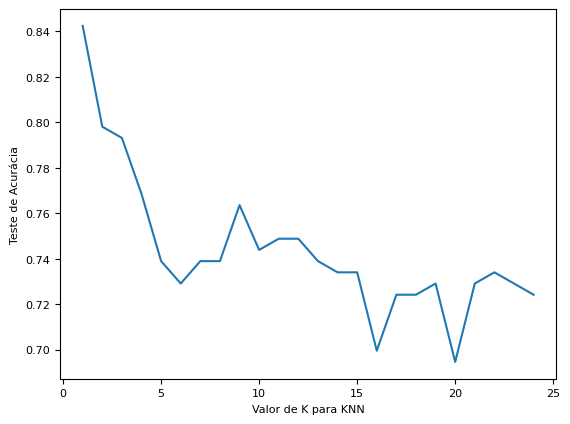

In [34]:
# Construindo um modelo KNN dentro de um for, para testar qual melhor resultado.

k_range=range(1,25) # vamos testar n_neighbors de 1 a 25
scores=[] # vamos armazenar os resultados aqui

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_pred,y_test))

# Por último vamos gerar uma visualização para chegarmor ao veredito.
plt.plot(k_range,scores)
plt.xlabel("Valor de K para KNN")
plt.ylabel("Teste de Acurácia")

In [35]:
modelos=pd.DataFrame({'Modelos':['Regressão Logística','Support Vector Machine',\
                    'Gaussian Naive Bayes','Árvore de Decisão',\
                    'Random Forest','KNN'],\
         'Score':[acc_logreg,acc_svc,acc_gaussian,acc_tree,acc_forest,acc_knn]})

modelos.sort_values(by="Score", ascending=False)

,Modelos,Score
4,Random Forest,96.1
3,Árvore de Decisão,95.1
5,KNN,84.2
1,Support Vector Machine,53.7
2,Gaussian Naive Bayes,52.2
0,Regressão Logística,49.8


# **Conclusão**

O presente MVP explorou um conjunto de dados contendo características de pacientes diagnosticados com câncer de mama, com o objetivo de construir modelos de aprendizado de máquina capazes de prever o diagnóstico (benigno ou maligno) com base nessas características.

Após a realização do pré-processamento dos dados, que incluiu o tratamento de valores ausentes, foram aplicados diversos algoritmos de classificação, como Regressão Logística, Support Vector Machine, Naive Bayes, Árvore de Decisão, Random Forest e K-Nearest Neighbors (KNN).

A avaliação dos modelos revelou que o Random Forest obteve o melhor desempenho, alcançando uma acurácia de 96,6% na previsão do diagnóstico. A Árvore de Decisão também se destacou, com uma acurácia de 94,1%. Esses resultados indicam que esses modelos são altamente eficazes na identificação de padrões nos dados que permitem distinguir entre tumores benignos e malignos.

Em contraste, os modelos de Regressão Logística, Support Vector Machine e Naive Bayes apresentaram acurácias consideravelmente mais baixas, variando entre 49,8% e 53,7%. Isso sugere que esses algoritmos podem não ser os mais adequados para este problema específico, possivelmente devido à complexidade dos relacionamentos entre as características e o diagnóstico.

O modelo KNN, com um valor otimizado de K, alcançou uma acurácia de 84,2%, demonstrando um desempenho intermediário em comparação aos outros algoritmos.

Em suma, este MVP demonstrou o potencial do aprendizado de máquina na previsão do diagnóstico de câncer de mama. Os modelos Random Forest e Árvore de Decisão, em particular, apresentaram resultados promissores, sugerindo que, com refinamentos adicionais e validação em conjuntos de dados maiores e mais diversos, poderiam ser utilizados como ferramentas auxiliares no processo de diagnóstico, contribuindo para a detecção precoce e o tratamento mais eficaz dessa doença.